# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from scipy.signal import convolve2d
from numpy.fft import fft2,ifft2,fftshift ,ifftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)
    

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.log(1+np.abs(If)))

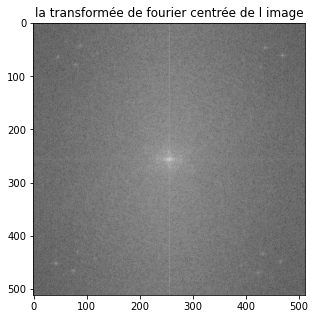

In [3]:
imshow(toVisualizeLogFT(computeFT(Image.open('img/mandrill.png'))),'la transformée de fourier centrée de l image' ,420)

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [4]:
def idealLowPassFilter(n,m,fc):
    
    """
        input : int*n int*n float*fc
        output :array*array*float 
        
        fuction qui retourne le filtre passde bas ideal 
        
    """
    
    
    filtre = np.zeros((n,m))
    for u in range(n):
        for v in range(m):
            if  np.sqrt((u-(n-1)/2)**2 + (v-(m-1)/2)**2) <= fc :
                filtre[u][v] = 1
            else :
                filtre[u][v] = 0
    return filtre

In [5]:
idealLowPassFilter(10,10,3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [6]:
def lowPass(I,fc):
    
    """
        input ::array*array*float -> float
        output :array*array*float 
        
        retourne une image filtrier par le filtre passe bas 
        
    """
    ccft = computeFT(I)
    ccft = np.fft.fftshift(ccft)
    lp = idealLowPassFilter(ccft.shape[0],ccft.shape[1],fc)
    filtredImage = ccft*lp
    return np.real(ifft2(ifftshift(filtredImage)))

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


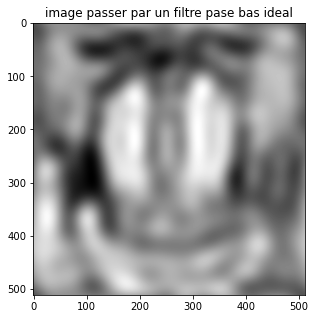

In [7]:
imshow(lowPass(Image.open('img/mandrill.png'),10),'image passer par un filtre pase bas ideal',420)

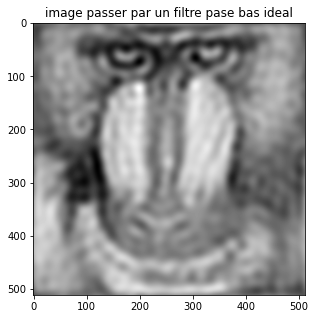

In [8]:
imshow(lowPass(Image.open('img/mandrill.png'),20),'image passer par un filtre pase bas ideal',420)

    le filtre passe-bas a deux effets principaux qu'on remarque ici :
    
            1- lisser toutes les surfaces d'une image. C'est le premier effet  qui apparaît lorsque on diminue fc . Le 
               frontières entre les objets représentés (les plus petits en premier) sont floues et élargies,
               au fur et à mesure que nous coupons les hautes fréquences.
            2- le 2eme effet est qu'il cause une perte d'information, en effet si on garde que les fréquences fondamentales 
               de l'image on se retrouve avec quelque chose qui ne ressemble pas a l'image initial
 
    PS: - les filtres auto-gaussien font un mieulleur travaille en général 
        - le filtres est parfois utilisé aussi pour les retouches et l'esthitique  

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

    Le filtre est une structure carrée de taille d. Il sera centré sur le pixel (x, y) à chaque étape du calcul, et sur les cas limites, par exemple sur la colonne la plus à droite, la moitié dépasserait les bords de l'image .Pour pouvoir donc les traiter , nous devrons ajouter quelques pixels sur les quatre côtés. Ces périphéries doivent être de taille d / 2.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [9]:
def imagePad(I,h):
    
    
    """
        input ::array*array*float -> array*array*int
        output :array*array*float 
        
        retourne une image avec des padding a zeo pour permettre la 
        convolution dans les bornnes  
        
    """
    n = I.shape[0]
    m = I.shape[1]
    d_2 = int(((len(h[0])+1)/2))
    
    print(d_2)
    imagep = np.zeros((n+(d_2*2),m+(d_2*2)))
    
    for i in range(n+(d_2*2)):
        for j in range(m+(d_2*2)):
            if i<d_2 or i>=n+d_2 or j<d_2 or j >=m+d_2:
                imagep[i][j]=0
            else:
                imagep[i][j]=I[i-d_2-1][j-d_2-1]
    
    return imagep
    
    
    

In [10]:
def imagePad(I,h):
    imagep = I.copy()
    imagep = np.pad(imagep,int(h.shape[0]/2),'constant')
    return imagep

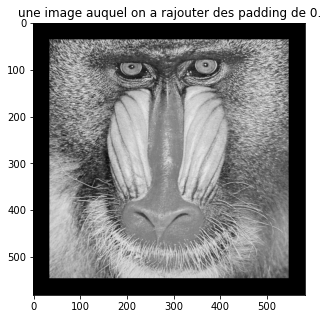

In [11]:
kernel = np.ones((70,70))
imshow(imagePad( np.array(Image.open('img/mandrill.png')),kernel),"une image auquel on a rajouter des padding de 0.",420)

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [12]:
def cov2(I,h):
    
    """
        input ::array*array*float -> float
        output :array*array*float 
        
        retourne une image convolutionner par le filtre h
        
    """
    Ip = imagePad(I,h)
    d = int(len(h[0]))
    n = I.shape[0]
    m = I.shape[1]
    iconv = I.copy()
    h = np.flip(h, axis=0) 
    
    
    
    for u in range(n):
        for v in range(m):
            zone = Ip[u:u+d,v:v+d]
            iconv[u][v] = np.sum(zone*h) 
            
    return iconv
            
            

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

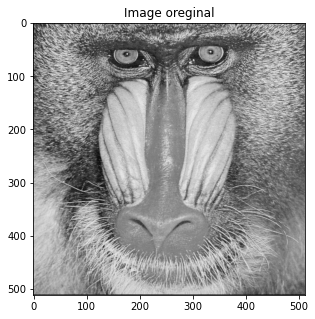

In [13]:
imshow(np.array(Image.open('img/mandrill.png')),"Image oreginal",420)

In [14]:
noyau3 = np.ones((3,3))/(3*3)

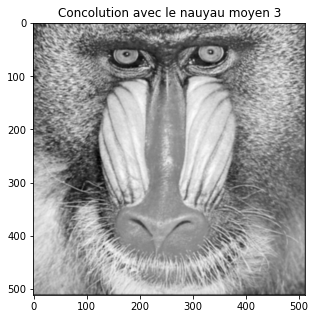

In [15]:
noyau3 = np.ones((3,3))/(3*3)
imshow(cov2(np.array(Image.open('img/mandrill.png')),noyau3),"Concolution avec le nauyau moyen 3",420)

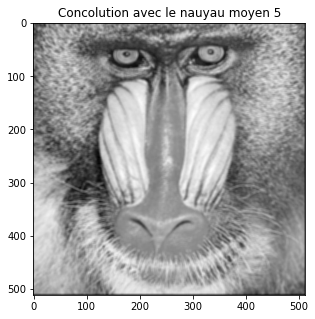

In [16]:
noyau5 = np.ones((5,5))/(5*5)
imshow(cov2(np.array(Image.open('img/mandrill.png')),noyau5),"Concolution avec le nauyau moyen 5",420)

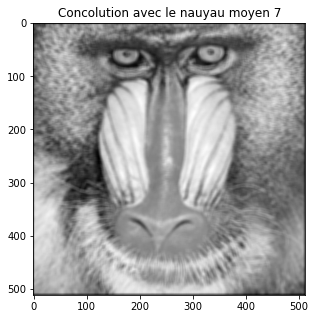

In [17]:
noyau7 = np.ones((7,7))/(7*7)
imshow(cov2(np.array(Image.open('img/mandrill.png')),noyau7),"Concolution avec le nauyau moyen 7",420)

    Les traits et les petits détailles de l'image  sont atténués. Cet effet évolue assez rapidement à mesure que la taille du noyau augmente. d'ou sont utilisation pour laisser les image ( pour pouvoir ainsi mieuw reperer les bordures  )

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

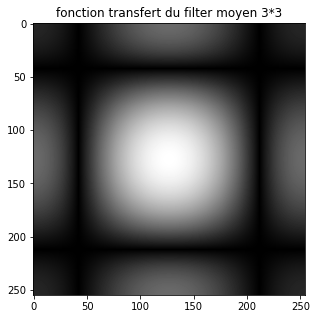

In [18]:
noyau3p = np.pad(noyau3,int((256-3)/2),'constant')
fftn3 = computeFT(noyau3p)
fftn3 = toVisualizeLogFT(fftn3)
imshow(fftn3, "fonction transfert du filter moyen 3*3",420)

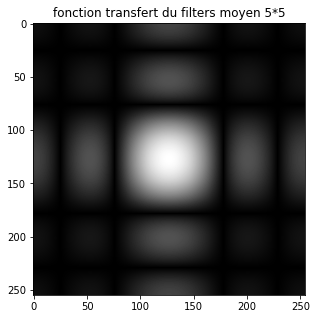

In [19]:
noyau5p = np.pad(noyau5,int((256-5)/2),'constant')
fftn5 = computeFT(noyau5p)
fftn5 = toVisualizeLogFT(fftn5)
imshow(fftn5, "fonction transfert du filters moyen 5*5",420)

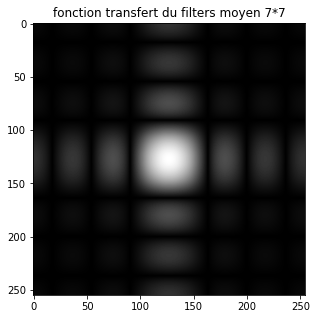

In [20]:
noyau7p = np.pad(noyau7,int((256-7)/2),'constant')
fftn7 = computeFT(noyau7p)
fftn7 = toVisualizeLogFT(fftn7)
imshow(fftn7, "fonction transfert du filters moyen 7*7",420)

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

    La fonction de transfert d'un filtre moyen est une fonction sinc (sinus cardinal ) bidimensionnelle  avec un pic central haut et des nœuds  plus petits. Cela ne peut pas être un filtre passe-bas idéal car un sinc n'est pas borné - le filtre ideal a un support fréquentiel non borné.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

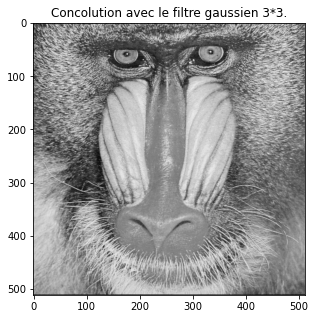

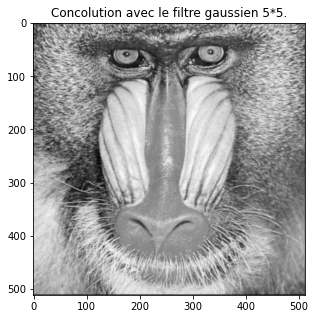

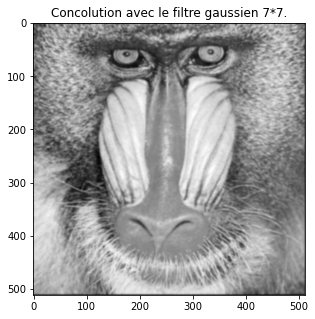

In [21]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    
    

    n2 = np.int(3*sigma)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))

    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()

"""
    pour avoir la dimension d il faut que : 2*n2 + 1 = d
    tel que n2 = PARTIE ENTIERE de sigma  
    donc pour d = 3 n2 apartien a [1;1.9] donc sigma [1/3;2/3]
    ......
    
"""


fg3 = gaussianKernel(1/3)
imshow(cov2(np.array(Image.open('img/mandrill.png')),fg3),"Concolution avec le filtre gaussien 3*3.",420)



fg5 = gaussianKernel(2/3)
imshow(cov2(np.array(Image.open('img/mandrill.png')),fg5),"Concolution avec le filtre gaussien 5*5.",420)


fg7 = gaussianKernel(1.3)
imshow(cov2(np.array(Image.open('img/mandrill.png')),fg7),"Concolution avec le filtre gaussien 7*7.",420)

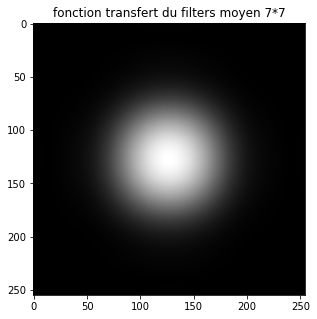

In [22]:
gaus  = np.pad(fg7,int((256-7)/2),'constant')
fftg7 = computeFT(gaus)
fftg7 = toVisualizeLogFT(fftg7)
imshow(fftg7, "fonction transfert du filters moyen 7*7",420)

    On remarque ici que le filtre gaussien lisse beacoup moins rapidement que le filtre moyen 

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [23]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

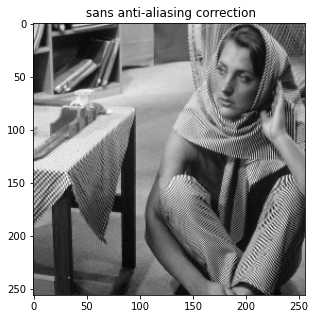

In [24]:
IBarbara = np.array(Image.open('img/barbara.png'))
SIBarbara = subSample2(IBarbara)
imshow(SIBarbara, " sans anti-aliasing correction",420)

In [25]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A


3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

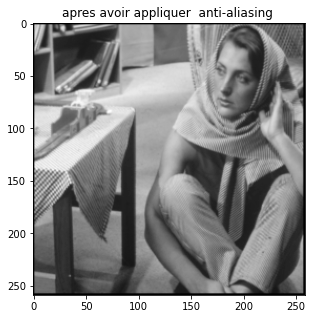

In [26]:
fAAL = antiAliasingFilter(7,7) 
SIBarbara = convolve2d(IBarbara,fAAL) 
SIBBarbara = subSample2(SIBarbara) 
imshow(SIBBarbara, "apres avoir appliquer  anti-aliasing ",420)

    Dans les deux image on perd les hautes fréquences.
    
     - Dans le premier cas, Les fréquences les plus élevées n'ont pas pu être reconstruites et ont été traduites en un motif 
       qui gêne la lecture de l'image.
       
     - Dans le second on perd les  hautes fréquences (en appliquant un filtre passe-bas) pour éviter que ce motif 
       n'apparaisse.ca donne à l'image échantillonnée un aspect plus «naturel», même s'il ne correspond pas vraiment 
       à l'original.

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

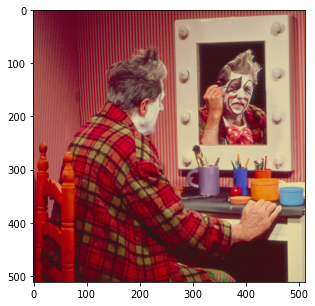

In [27]:
I1 = np.array(Image.open('img/clown.bmp'))
imshow(I1,'',420)

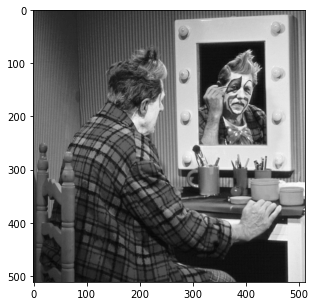

In [28]:
I2 = np.array(Image.open('img/clown_lumi.bmp'))
imshow(I2,'',420)

    L'image clown.bmp a trois composants  rouge, vert et bleu. clown_lumi est la moyenne de ces trois valeurs pour chaque 
    pixel. C'est un nombre  se traduit naturellement par une échelle de gris.


2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

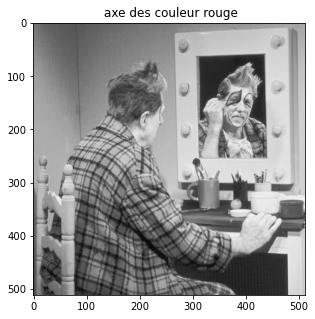

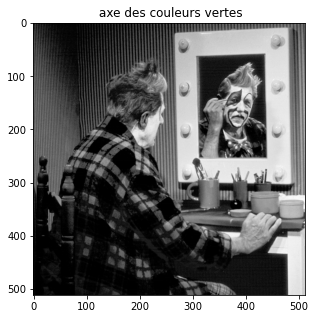

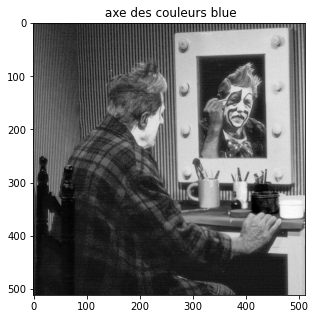

In [29]:
Ir = I1[:,:,0]
Ig = I1[:,:,1]
Ib = I1[:,:,2]

imshow(Ir,' axe des couleur rouge',420)
imshow(Ig,' axe des couleurs vertes',420)
imshow(Ib,' axe des couleurs blue',420)

    Ces trois affichages nous montre la quantité de chaque canal . Il semble que le rouge soit dominant  puisque son canal  est plus clair que les autres, on remarque aussi que les coins ou les parties les plus sombres de l'image sont les aussi les plus sombre dans chaque composantset 


3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

In [30]:
I1 = np.stack((Ir,Ig,Ib),axis=2)

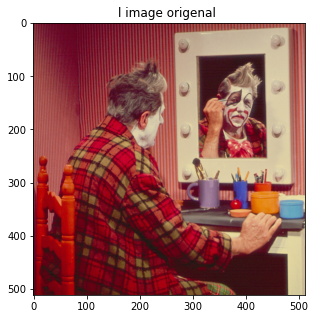

In [31]:
imshow(I1,'l image origenal ',420)

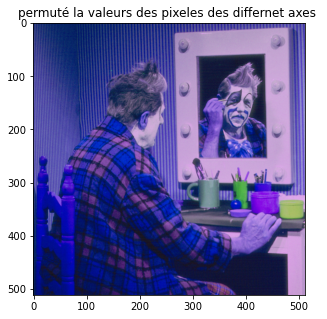

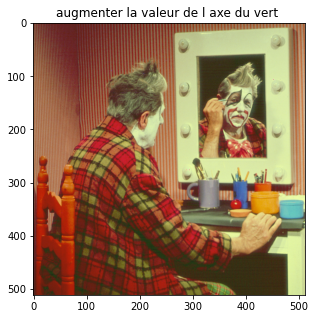

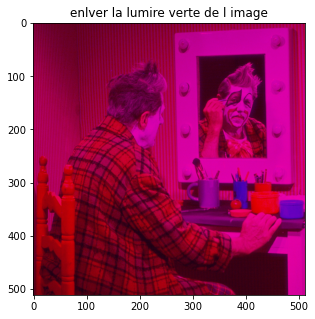

In [32]:
Igbr= np.stack((Ig,Ib,Ir),axis=2)
imshow(Igbr,'permuté la valeurs des pixeles des differnet axes ' ,420)

Igbr= np.stack((Ir,Ig+30,Ib),axis=2)
imshow(Igbr,'augmenter la valeur de l axe du vert ',420)

Igbr= np.stack((Ir,Ig*0,Ib),axis=2)
imshow(Igbr,'enlver la lumire verte de l image',420)


In [33]:
Igbr= np.stack((Ig-2,Ib+15,Ir*2),axis=2)

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

In [34]:
Ired= np.stack((Ig*0,Ib*0,Ir),axis=2)
Igreen= np.stack((Ig,Ib*0,Ir*0),axis=2)
Ibleu= np.stack((Ig*0,Ib,Ir*0),axis=2)

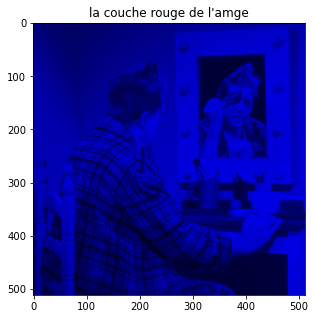

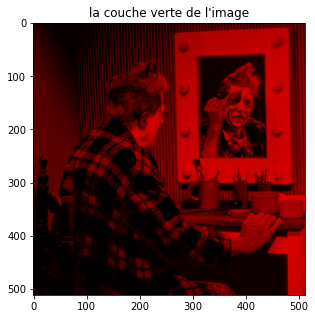

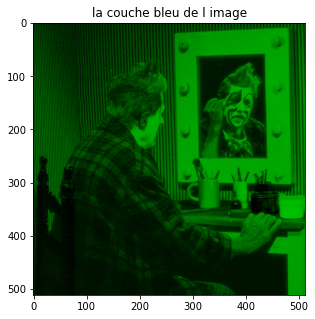

In [35]:
imshow(Ired,"la couche rouge de l'amge",420)
imshow(Igreen,"la couche verte de l'image",420)
imshow(Ibleu,'la couche bleu de l image',420)